In [2]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris, make_moons, make_circles
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.base import clone
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.decomposition import PCA, KernelPCA

#import graphviz
from sklearn import preprocessing
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


# DIFERENCIA ENTRE PCA Y LDA Y CUANDO ELEGIR UNO U OTRO
* PCA IDENTIFICA LA COMBINACIÓN DE ATRIBUTOS (COMPONENTES PRINCIPALES) QUE TOMEN LA MAYOR VARIANZA DE LOS DATOS
* LDA IDENTIFICA ATRIBUTOS QUE TOMEN EN CUENTA LA MAYOR VARIANZA ENTRE CLASES
* LDA ES UN MÉTODO SUPERVISADO QUE UTILIZA ETIQUETAS DE CLASES CONOCIDAS

In [3]:
# Comparativo LDA y PCA
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X, y).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X,y).transform(X)

print('explained variance ratio (first two components): ', pca.explained_variance_ratio_)



explained variance ratio (first two components):  [0.92461872 0.05306648]


# Proyecto Abalone
*  PCA VS LDA

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8
   0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


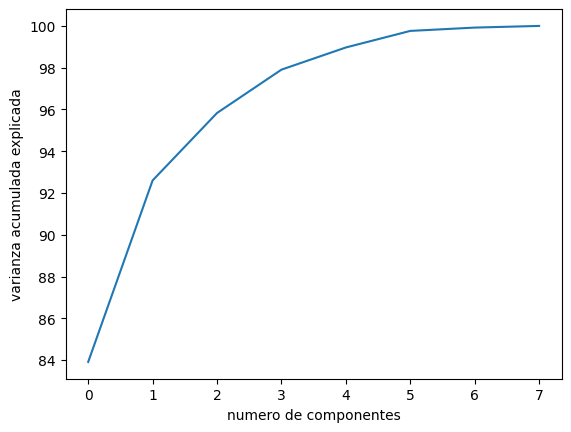

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ML_Udemy/Datasets/abalone.data')
print(df1.head())

X = df1.iloc[:,1:]
print(X.head())

sc = StandardScaler()
pca = PCA(n_components=None)
X_sc = sc.fit_transform(X)
pca.fit(X_sc)
np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('numero de componentes')
plt.ylabel('varianza acumulada explicada')
plt.show()



# Comparativo entre PCA y LCA

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


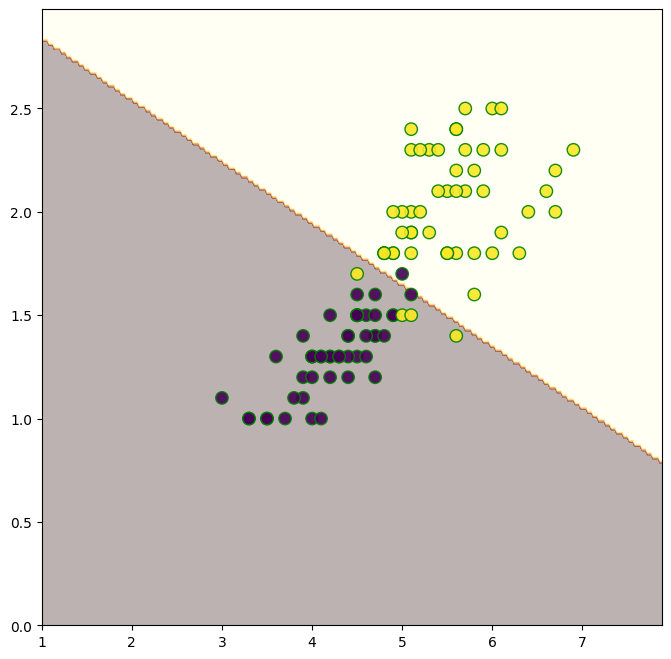

In [5]:
#1. Preparación de los datos
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0, 'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

#2. Modelo de Analsis de Discriminante Lineal
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap= 'afmhot', alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha=0.9, edgecolors='g')
plt.show()

